In [2]:
import requests

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
import base64

In [4]:
url = "http://f7d06ad961d7.eu.ngrok.io/stylize"


In [5]:
content = '/home/volodymyr/Pictures/check.png'

In [6]:
style = '/home/volodymyr/picaso3.jpg'

In [7]:
def to_bytes(image):
    with BytesIO() as output:
        with Image.fromarray(image) as img:
            img.convert('RGB').save(output, 'BMP')
        data = output.getvalue()
    return str(base64.b64encode(data))[1:].replace('"','')

In [8]:
content_arr = np.array(Image.open(content))
style_arr = np.array(Image.open(style))

In [9]:
body = {"content_image" : to_bytes(content_arr),
       "style_image" : to_bytes(style_arr)}

In [10]:
import json

In [11]:
r = requests.post(url, json=body)

In [12]:
image = Image.open(BytesIO(base64.b64decode(json.loads(r.content.decode()))))

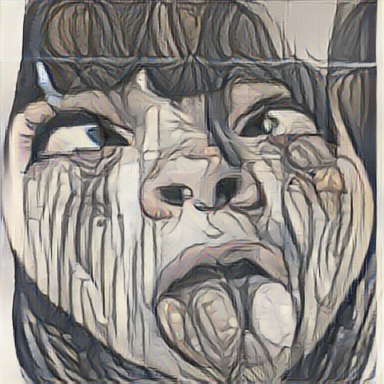

In [13]:
image

In [34]:
image = np.array(image).astype(np.uint8).reshape(384,384,3)

In [35]:
def show_results(images,titles = ['style','content','result']):
    fig, ax = plt.subplots(1,3, figsize=(14,12))
    for c,image in enumerate(images):
        ax[c].imshow(image)
        ax[c].set_title(titles[c])

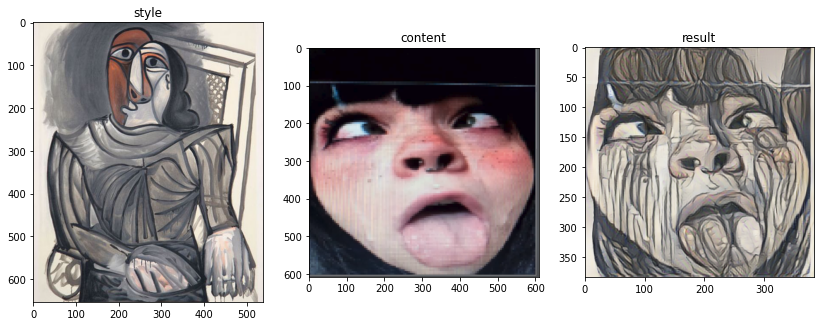

In [36]:
show_results([style_arr,content_arr, image])